### Importação dos dados



In [1197]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

print(loja['Produto'].value_counts().to_dict())
print()
print(loja4['Produto'].value_counts().to_dict())


{'Micro-ondas': 60, 'TV Led UHD 4K': 60, 'Guarda roupas': 60, 'Secadora de roupas': 58, 'Cômoda': 56, 'Blocos de montar': 56, 'Bola de basquete': 55, 'Bicicleta': 54, 'Copo térmico': 54, 'Geladeira': 54, 'Impressora': 54, 'Bateria': 53, 'Faqueiro': 52, 'Carrinho controle remoto': 52, 'Modelagem preditiva': 51, 'Fone de ouvido': 50, 'Xadrez de madeira': 49, 'Celular Plus X42': 49, 'Lava louças': 48, 'Lavadora de roupas': 47, 'Guitarra': 47, 'Violão': 46, 'Sofá retrátil': 46, 'Cadeira de escritório': 46, 'Fogão': 45, 'Cama box': 44, 'Kit banquetas': 44, 'Smart TV': 44, 'Cama king': 44, 'Cubo mágico 8x8': 44, 'Mesa de centro': 44, 'Jogo de panelas': 43, 'Smartwatch': 43, 'Jogo de tabuleiro': 43, 'Bola de vôlei': 42, 'Dashboards com Power BI': 42, 'Tablet ABXY': 42, 'Poltrona': 41, 'Iniciando em programação': 41, 'Jogo de copos': 41, 'Assistente virtual': 40, 'Boneca bebê': 40, 'Mesa de jantar': 40, 'Dinossauro Rex': 40, 'Corda de pular': 40, 'Mochila': 39, 'Ciência de dados com python': 3

# 1. Análise do faturamento


In [1199]:
def faturamento_total(loja):
    faturamento = sum(loja["Preço"])
    return faturamento

In [1200]:
lojas = [loja, loja2, loja3, loja4]
nome_loja= [f"Loja {i+1}" for i in range(len(lojas))]

faturamento = {"Faturamento":[faturamento_total(loja) for loja in lojas]}
faturamento_lojas = pd.DataFrame(data=faturamento, index=nome_loja)
faturamento_lojas

,Faturamento
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


# 2. Vendas por Categoria


In [1203]:
def vendas_categoria(loja):
    categorias = loja['Categoria do Produto']
    vendas = {}
    for categoria in categorias:
        if categoria in vendas: 
            vendas[categoria] += 1
        else: 
            vendas[categoria] = 1
    
    return vendas

In [1211]:
def categoria_mais_popular(vendas): 
    if not vendas:
        return None, 0
    categoria_mais_vendida = max(vendas, key=vendas.get)
    return categoria_mais_vendida, vendas[categoria_mais_vendida]

In [1213]:
dados = []
categoria_mais_vendida =[]
for i in range(len(lojas)): 
    vendas = vendas_categoria(lojas[i])
    categoria, quantidade = categoria_mais_popular(vendas)
    categoria_mais_vendida.append({categoria:quantidade})
    dados.append(vendas)

    
vendas_por_categoria = pd.DataFrame(dados, index=nome_loja)
vendas_por_categoria["Categoria mais vendida"] = categoria_mais_vendida
vendas_por_categoria.T

,Loja 1,Loja 2,Loja 3,Loja 4
eletronicos,448,422,451,451
moveis,465,442,499,480
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
utilidades domesticas,171,181,177,201
esporte e lazer,284,275,277,277
livros,173,197,185,187
instrumentos musicais,182,224,177,170
Categoria mais vendida,{'moveis': 465},{'moveis': 442},{'moveis': 499},{'moveis': 480}


# 3. Média de Avaliação das Lojas

In [1216]:


def calcular_media(loja):
    media = sum(loja['Avaliação da compra']) / len(loja)
    return int(media * 10) / 10

calcular_media(loja)

3.9

In [1218]:
media_lojas = []
for loja in lojas:
    media = calcular_media(loja)
    media_lojas.append(media)

avaliacao = pd.DataFrame(columns=["Média de avaliação"], data = media_lojas, index=nome_loja)
avaliacao

,Média de avaliação
Loja 1,3.9
Loja 2,4.0
Loja 3,4.0
Loja 4,3.9


# 4. Produtos Mais e Menos Vendidos

In [1221]:
def produtos_mais_vendidos(loja):
    produtos = loja['Produto']
    vendas = {}
    for produto in produtos:
        if produto in vendas: 
            vendas[produto] += 1
        else: 
            vendas[produto] = 1

    for venda in vendas.items():
        if venda[1] == max(vendas.values()):
            mais_vendido = venda
        elif venda[1] == min(vendas.values()):
            menos_vendido = venda
    
    return mais_vendido, menos_vendido, vendas

In [1223]:
from matplotlib import pyplot as plt


prod_mais_vendidos = []
prod_menos_vendidos = []
vendas = []
for i in range(len(lojas)):
    vendas = produtos_mais_vendidos(lojas[i])
    prod_mais_vendidos.append(vendas[0])
    prod_menos_vendidos.append(vendas[1])
    vendas = vendas[2]

analise_produtos = pd.DataFrame({'Mais vendido': prod_mais_vendidos,
                                 'Menos vendido':prod_menos_vendidos},
                                index=nome_loja)
analise_produtos

,Mais vendido,Menos vendido
Loja 1,"(Guarda roupas, 60)","(Celular ABXY, 33)"
Loja 2,"(Iniciando em programação, 65)","(Jogo de tabuleiro, 32)"
Loja 3,"(Kit banquetas, 57)","(Blocos de montar, 35)"
Loja 4,"(Cama box, 62)","(Guitarra, 33)"


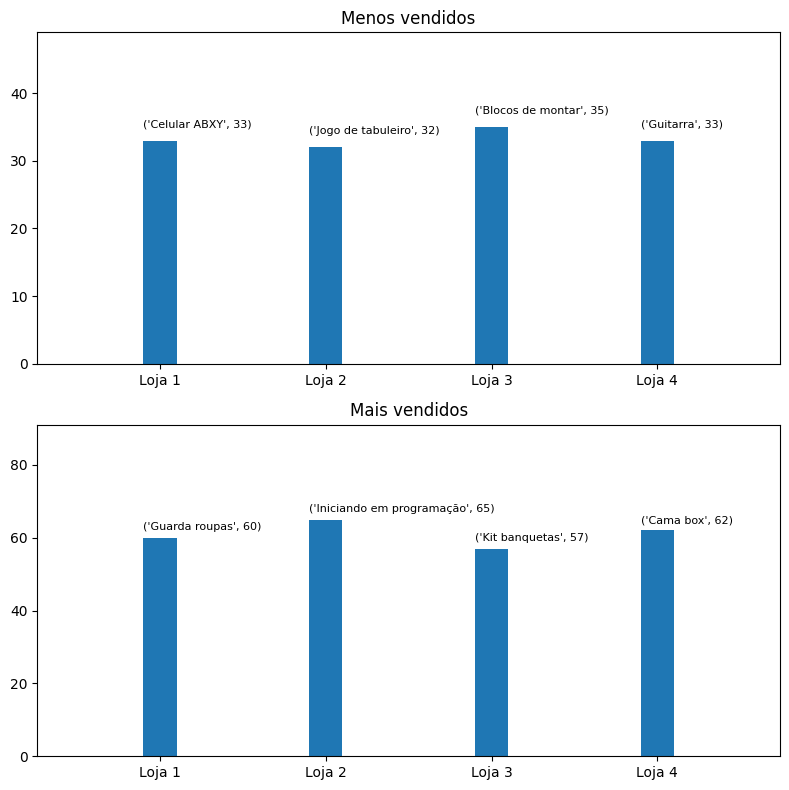

In [1225]:
x = nome_loja
menos_vendidos = [analise_produtos.iloc[i, 1][1] for i in range(len(lojas))]
mais_vendidos = [analise_produtos.iloc[i, 0][1] for i in range(len(lojas))]
s = [analise_produtos.iloc[i, 1] for i in range(len(lojas))]
s1 = [analise_produtos.iloc[i, 0] for i in range(len(lojas))]


fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8))

ax1.bar(x, menos_vendidos, width=.2)
ax2.bar(x, mais_vendidos, width=.2)
ax1.margins(x=.2, y=.4)
ax2.margins(x=.2, y=.4)
ax1.set_title('Menos vendidos')
ax2.set_title('Mais vendidos')
fig.tight_layout()

for i in range(len(x)):
        ax1.text(i - .1, menos_vendidos[i] + 2, s[i], size=8)
        ax2.text(i - .1, mais_vendidos[i] + 2, s1[i], size=8)
    

plt.show()

# 5. Frete Médio por Loja

In [1228]:
def calcular_frete(loja):
    frete_media = sum(loja['Frete']) / len(loja)
    return round(frete_media, 2)

In [1230]:
frete_dados = [calcular_frete(loja) for loja in lojas]

df_frete = pd.DataFrame({'Frete Médio':frete_dados}, index=nome_loja)
df_frete

,Frete Médio
Loja 1,34.69
Loja 2,33.62
Loja 3,33.07
Loja 4,31.28
